In [597]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
from datetime import datetime
from pprint import pprint 
import time
%matplotlib inline

In [2]:
for root,dirs,files in os.walk('//home/yaoting/Common_Wealth_RS/cw01_yaoting/cw01'):
    pprint(files)
    file_list = files

['.~lock.doc1_viewing_data.csv#',
 'doc1_viewing_columnExp.csv',
 'doc1_viewing_history_cateID.csv',
 'doc2_conversion_table.csv',
 '.~lock.doc1_viewing_history_cateID.csv#',
 'doc3_post_and_clicks.csv',
 'DailyPost.csv',
 'README.md',
 'etu_log.csv',
 '.git',
 'doc1_viewing_data.csv',
 'doc2_conversion_reference.csv',
 '.~lock.doc1_viewing_columnExp.csv#',
 'cw-article.csv',
 'article_contents.csv']
['EDA.ipynb']
['EDA-checkpoint.ipynb']
['article_contents-checkpoint.csv',
 'DailyPost-checkpoint.csv',
 'cw-article-checkpoint.csv',
 'README-checkpoint.md']


In [3]:
file_parent_path = '//home/yaoting/Common_Wealth_RS/cw01_yaoting/cw01/'
df_etu_log = pd.read_csv(file_parent_path + 'etu_log.csv', engine = 'python',error_bad_lines=False)
df_etu_log.head()

Skipping line 4359075: unexpected end of data


,time,act,cat,pid,eruid,keywords,url,hostname,agent,predn,preurl,lo,ssid,paywall,dates,eturec
0,00:00:02,view,79.0,5088277.0,375b2a4d-6b06-c1aa-1cf6-a9472e820d65,NaN,https://www.cw.com.tw/article/article.action?i...,www.cw.com.tw,Mozilla/5.0 (Linux; Android 6.0.1; HTC_D10u Bu...,m.facebook.com,http://m.facebook.com/,0.0,8fa8df160d30,NaN,2018-02-18,NaN
1,00:00:01,view,11.0,5087710.0,1be09de3-2363-1350-b095-221d37445280,NaN,https://www.cw.com.tw/article/article.action?i...,www.cw.com.tw,Mozilla/5.0 (iPhone; CPU iPhone OS 11_2_5 like...,m.facebook.com,http://m.facebook.com,0.0,c0430e760562,NaN,2018-02-18,NaN
2,00:00:02,view,85.0,5088005.0,ced1cce8-08cc-0e84-82ec-b1b1ce6f32a0,NaN,https://www.cw.com.tw/article/article.action?i...,www.cw.com.tw,Mozilla/5.0 (iPhone; CPU iPhone OS 10_3_1 like...,m.facebook.com,http://m.facebook.com,0.0,eed333bf3ef0,NaN,2018-02-18,NaN
3,00:00:02,view,11.0,5088180.0,bde6bba0-bd52-e4b3-a17b-18cd72b02214,NaN,https://www.cw.com.tw/article/article.action?i...,www.cw.com.tw,Mozilla/5.0 (iPhone; CPU iPhone OS 11_2_5 like...,m.facebook.com,http://m.facebook.com,0.0,bb8b100b1fad,NaN,2018-02-18,NaN
4,00:00:01,view,7.0,5081463.0,bb652779-3133-e1ec-5914-24d902b70197,NaN,https://www.cw.com.tw/article/article.action?i...,www.cw.com.tw,Mozilla/5.0 (Linux; Android 6.0.1; CPH1611 Bui...,www.google.com.tw,https://www.google.com.tw/,0.0,228acfd7c345,NaN,2018-02-18,NaN


In [4]:
df_article_id = pd.read_csv(file_parent_path + 'cw-article.csv')
df_article_id.head()

,id,title,keyword,author,type,masterChannelTitle,subChannelTitle,onlineTime
0,5000319,史上最強觀光潮 人多錢少,,賴建宇,天下雜誌,產業,製造,2011-04-13
1,5012398,訂單爆 工具機景氣大翻紅,NaN,辜樹仁,天下雜誌,產業,製造,2011-04-29
2,5015639,味全力創第二春,NaN,游常山,天下雜誌,產業,製造,2011-06-20
3,5015766,陳盛沺搖醒聲寶,NaN,洪震宇,天下雜誌,產業,製造,2011-06-20
4,5016019,小公司，大品牌,NaN,陳名君,天下雜誌,產業,製造,2011-06-20


# etu_log

In [5]:
df_etu_log.shape

(4359073, 16)

In [6]:
df_etu_log.columns
''' 
    4,359,073 logs with 16 columns below:
    df_etu_log.eruid
        time: At what time did the user click into the page(hour/min/sec)
        act: user behavior (view: 瀏覽, search: 搜尋)
        cat: article category(文章分類)
        pid: article id with mapping table df_article_id
        eruid: user logging record, in the form of uuid (Etu system created ID)(Etu is an information company) ***
        keywords: if the user using 'search', what kind of keyword he enters (for only 1% of the user uses 'search' method to get to the article, so we ignore this column first)
        url: the url link to the article 
        hostname': all are 'www.cw.com.tw'
        agent: user agent (Not familiar with how the agent name is consisted and first ignore the fact that maybe the user agent will influence user's behavior)
        prednnt: previous website domain before get to the article ***
        preurl: previous url link before get to the article ***
        lo: whether the user had logged in(0 for N, 1 for Y)
        df_etu_log.eruidssid: Session id
        paywall: whether there is a charging block popping up, lightbox1:non-logging user,lightbox2:logging user) 
        dates: dates (from 2018/01/01 - 2018/02/28)
        
        ---------------------------------------
        for cat:
        產業industry	7
        財經時事finance	8
        國際international	9
        經營管理business management	10
        時尚生活life and style	11
        環境environment	12
        教育education	13
        人物觀點folks perspective	14
        調查investigation	15
        經濟學人Economins	16
        df_etu_log.eruid數據圖表Statistcal graph	74
        政治社會Politics and Society	77
        專欄Columns	78
        健康關係Health	79
        廣告專輯Advertisement	83

''' 
    

" \n    4,359,073 logs with 16 columns below:\n    df_etu_log.eruid\n        time: At what time did the user click into the page(hour/min/sec)\n        act: user behavior (view: 瀏覽, search: 搜尋)\n        cat: article category(文章分類)\n        pid: article id with mapping table df_article_id\n        eruid: user logging record, in the form of uuid (Etu system created ID)(Etu is an information company) ***\n        keywords: if the user using 'search', what kind of keyword he enters ***\n        url: the url link to the article \n        hostname': all are 'www.cw.com.tw'\n        agent: user agent\n        prednnt: previous website domain before get to the article ***\n        preurl: previous url link before get to the article ***\n        lo: whether the user had logged in(0 for N, 1 for Y)\n        df_etu_log.eruidssid: Session id\n        paywall: whether there is a charging block popping up, lightbox1:non-logging user,lightbox2:logging user) \n        dates: dates (from 2018/01/01 - 2

In [7]:
def del_df_columns_list(df,column_name,name_list):
    
    """
    it can only delete one columns once 
    """
    
    for i in name_list:
        df = df[df[column_name] != i]
#     below is the pd.merge way to merge data, but sometime coz pd will mislead the columns due to dtypes
#     d = pd.DataFrame(data = name_list, columns = [column_name])
#     df = pd.merge(df, d, how = 'left', on = [column_name])
    

    
    return df

In [395]:
### Cleaning the data first 

### The duration is only 90 days, and the article is pretty long, so I believe those who read over 50 articles everyday is probably abnormal and would be web-crawler, so lets filter out them
del_list = df_etu_log.eruid.value_counts()[df_etu_log.eruid.value_counts() > 90*50].keys()
df_etu_log = del_df_columns_list(df_etu_log,'eruid',del_list)
### The time format should be like '**-**-**', so we filter out those length not equal to 8.
del_list = list(set([i for i in df_etu_log.time if len(i)!=8])) 
df_etu_log = del_df_columns_list(df_etu_log,'time',del_list)
### Creating the column using both time and date
df_etu_log['datetime'] = df_etu_log['dates'] +'-'+ df_etu_log['time']



In [10]:
df_etu_log.shape

(4226034, 16)

# Plotting

In [688]:
style.use('seaborn-poster')
style.use('ggplot')

Text(0, 0.5, 'Freq')

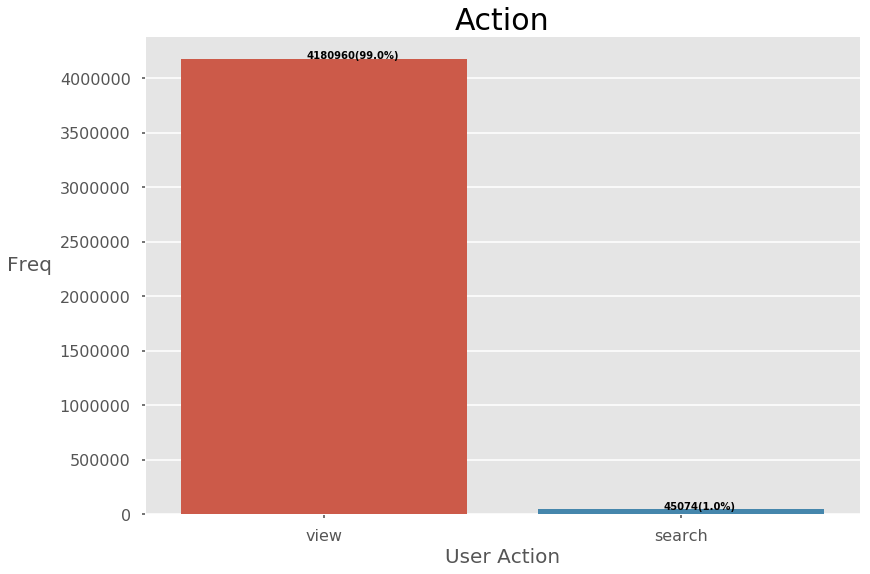

In [202]:
fig,ax = plt.subplots()

g = sns.barplot(x = df_etu_log.act.value_counts().keys(), y = df_etu_log.act.value_counts())
y = list(df_etu_log.act.value_counts())
for i,v in enumerate(y):
    g.text(i-0.05 ,v ,str(v)+'('+str(round(v/sum(y),2)*100)+'%)',fontweight = 'bold',size = 10)
plt.title('Action',size = 30)    
plt.xlabel('User Action',size = 20)
plt.ylabel('Freq',rotation = 'horizontal',size = 20,labelpad=30)

Text(0.5, 0, 'Freq')

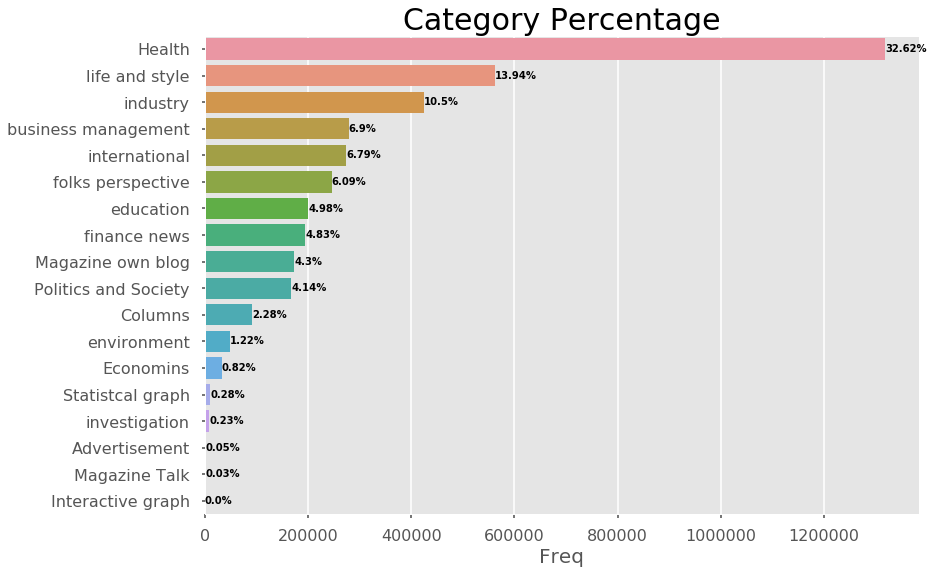

In [204]:
map_dict = {7:'industry',
            8:'finance news',
            9:'international',
            10:'business management',
            11:'life and style',
            12:'environment',
            13:'education',
            14:'folks perspective',
            15:'investigation',
            16:'Economins',
            74:'Statistcal graph',
            77:'Politics and Society',
            78:'Columns',
            79:'Health',
            83:'Advertisement',
            85:'Magazine own blog',
            86:'Magazine Talk',
            63:'Interactive graph'}

sub_freq_dict = {map_dict[i]:k for i,k in dict(df_etu_log.cat.value_counts()).items()}

fig,ax = plt.subplots()

g = sns.barplot(y = list(sub_freq_dict.keys()), x = list(sub_freq_dict.values()),orient='h')


x = list(sub_freq_dict.values())
for i,v in enumerate(x):
    g.text(v ,i+0.1 ,str(round(v*100/sum(x),2))+'%',fontweight = 'bold',size = 10)

plt.title('Category Percentage',size = 30)    
ax.set_xlabel('Freq',size = 20)


Text(0, 0.5, 'Freq')

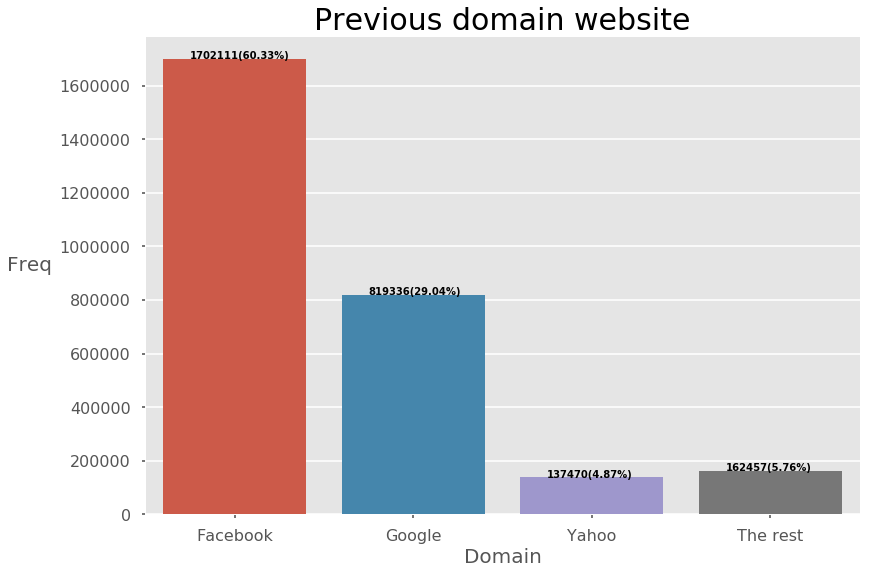

In [247]:
facebk.valuesook_num = len([i for i in df_etu_log.predn.values.astype(str) if 'facebook' in i ])
google_num = len([i for i in df_etu_log.predn.values.astype(str) if 'google' in i ])
yahoo_num = len([i for i in df_etu_log.predn.values.astype(str) if 'yahoo' in i ])
rest = sum(df_etu_log.predn.value_counts()) - facebook_num - google_num - yahoo_num

fig,ax = plt.subplots()

g = sns.barplot(x = ['Facebook','Google','Yahoo','The rest'], y = [facebook_num,google_num,yahoo_num,rest])
y =  [facebook_num,google_num,yahoo_num,rest]
for i,v in enumerate(y):
    g.text(i-0.25 ,v ,str(v)+'('+str(round(v*100/sum(y),2))+'%)',fontweight = 'bold',size = 10)

plt.title('Previous domain website',size = 30)    
plt.xlabel('Domain',size = 20)
plt.ylabel('Freq',rotation = 'horizontal',size = 20,labelpad=30)

Text(0, 0.5, 'User')

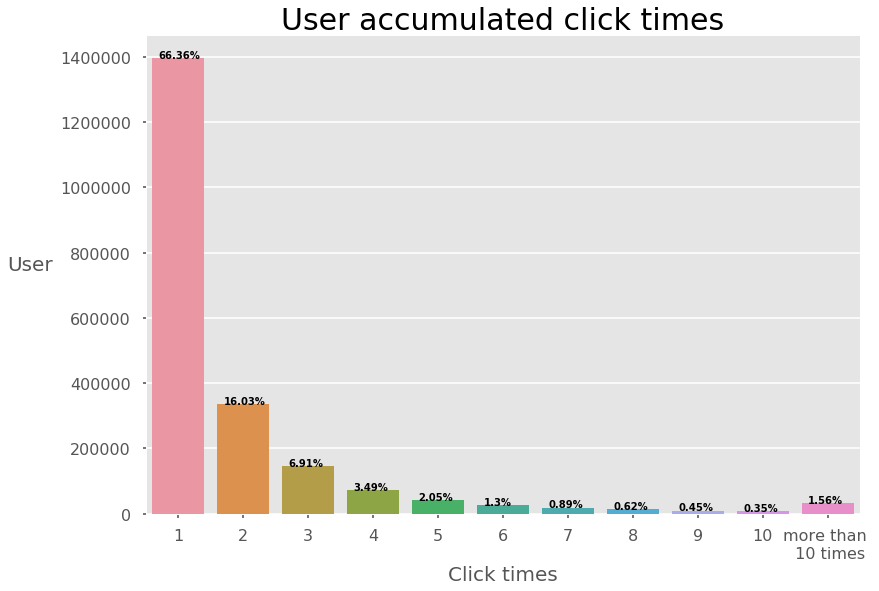

In [534]:
count_num = df_etu_log.eruid.value_counts()
Times_1_10 = count_num.value_counts()[:10]
Times_10_up = sum(count_num.value_counts()[10:])

fig,ax = plt.subplots()

g = sns.barplot(x = [str(i) for i in range(1,11)] + ['more than \n 10 times'], y = Times_1_10.values.tolist()+[Times_10_up])
y = Times_1_10.values.tolist() +[Times_10_up]
for i,v in enumerate(y):
    g.text(i-0.3 ,v ,str(round(v*100/sum(y),2))+'%',fontweight = 'bold',size = 10)
plt.title('User accumulated click times',size = 30)    
plt.xlabel('Click times',size = 20)
plt.ylabel('User',rotation = 'horizontal',size = 20,labelpad=30)

Text(0, 0.5, 'User')

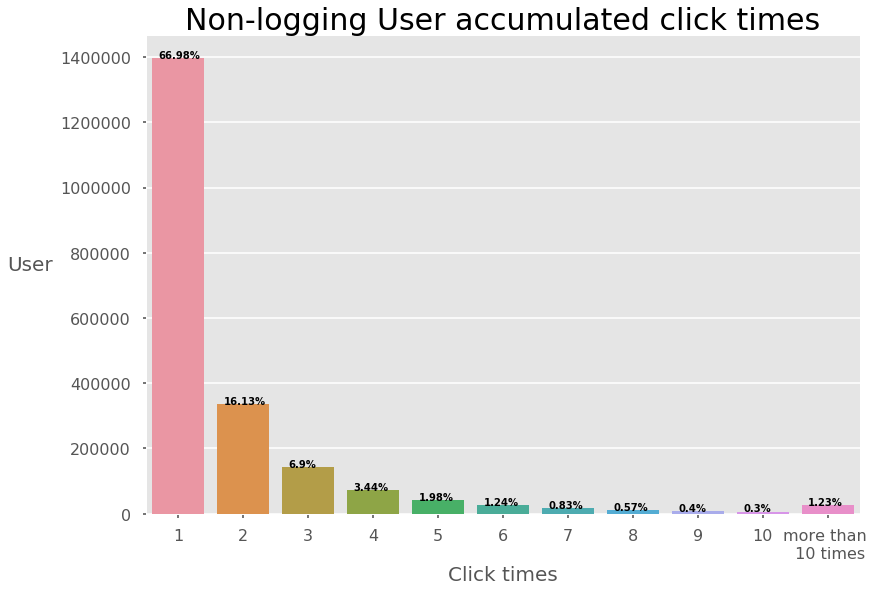

In [537]:
count_num = df_etu_log[df_etu_log.lo == 0].eruid.value_counts()
Times_1_10 = count_num.value_counts()[:10]
Times_10_up = sum(count_num.value_counts()[10:])

fig,ax = plt.subplots()

g = sns.barplot(x = [str(i) for i in range(1,11)] + ['more than \n 10 times'], y = Times_1_10.values.tolist()+[Times_10_up])
y = Times_1_10.values.tolist() +[Times_10_up]
for i,v in enumerate(y):
    g.text(i-0.3 ,v ,str(round(v*100/sum(y),2))+'%',fontweight = 'bold',size = 10)
plt.title('Non-logging User accumulated click times',size = 30)    
plt.xlabel('Click times',size = 20)
plt.ylabel('User',rotation = 'horizontal',size = 20,labelpad=30)

In [540]:
df_etu_log.lo.value_counts()

0.0    3967995
1.0     258013
Name: lo, dtype: int64

Text(0, 0.5, 'User')

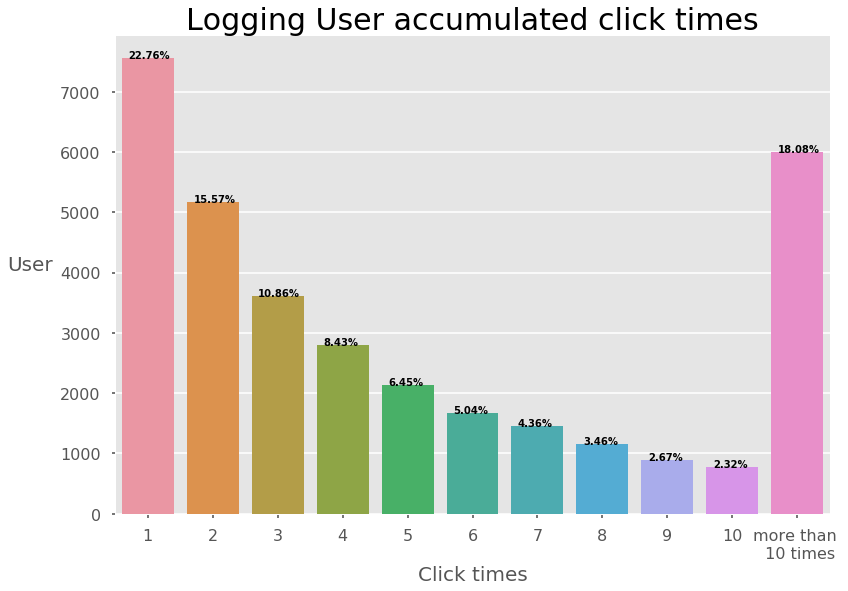

In [538]:
count_num = df_etu_log[df_etu_log.lo == 1].eruid.value_counts()
Times_1_10 = count_num.value_counts()[:10]
Times_10_up = sum(count_num.value_counts()[10:])



In [638]:
def time_diff(df, time_col, eruid_col):
    '''
    Get a list that calculate each user's time staying in the page
    '''
    def time_diff_cal(eruid):
        ### For sorting and calculating the time difference into a list
        str_time = df[df[eruid_col] == eruid].datetime.values
        date_time = []
        for i in range(len(str_time)):
            date_time.append(datetime.strptime(str_time[i],"%Y-%m-%d-%H:%M:%S"))
        date_time.sort() ### inplace function
        interval = []
        for i in range(len(date_time)-1):
            if (date_time[i+1]-date_time[i]).total_seconds() < 3600: ### for longer than 1 hours, drop it
                interval.append((date_time[i+1]-date_time[i]).total_seconds())

        return interval
    
    
    k = df.groupby(eruid_col).size()
    list_2_up = []
    for keys,values in zip(k.keys().tolist(),k.values):
        if values >= 2:
            list_2_up.append(keys)
    print('list_2_up is done')
    
    
    list_all_time =[]
    list_id_time = []
     
    for t,i in enumerate(list_2_up):
        list_eruid_name = i
        interval = time_diff_cal(i)
        list_id_time.append([list_eruid_name,interval])
        list_all_time = list_all_time +interval
        if t % 30000 == 0:
            print(str(t)+' has been processed, out of '+ str(len(list_2_up)) )
            print(len(list_all_time))
            

    
            
    return list_all_time, list_id_time

In [639]:
list_all_time, list_id_time = time_diff(df_etu_log,'datetime','eruid')

list_2_up is done
0 has been processed, out of 707961
5
30000 has been processed, out of 707961
48088
60000 has been processed, out of 707961
97528
90000 has been processed, out of 707961
147384
120000 has been processed, out of 707961
196951
150000 has been processed, out of 707961
246457
180000 has been processed, out of 707961
297081
210000 has been processed, out of 707961
346562
240000 has been processed, out of 707961
394839
270000 has been processed, out of 707961
444161
300000 has been processed, out of 707961
498022
330000 has been processed, out of 707961
546192
360000 has been processed, out of 707961
596326
390000 has been processed, out of 707961
646415
420000 has been processed, out of 707961
695144
450000 has been processed, out of 707961
743200
480000 has been processed, out of 707961
792638
510000 has been processed, out of 707961
841739
540000 has been processed, out of 707961
892751
570000 has been processed, out of 707961
942852
600000 has been processed, out of 707

In [643]:
list_time_back_up = list_all_time.copy()

In [649]:
def grouping_function(input_list,grouping_list):
    input_list_temp = input_list.copy()
    for i,n in enumerate(input_list_temp):
        if  n >= grouping_list[-1]:
                input_list_temp[i] = grouping_list[-1]
        for j in grouping_list:
            if n < j:
                input_list_temp[i] = j
                break
    return input_list_temp

([<matplotlib.axis.XTick at 0x7fd70545ba20>,
 <a list of 11 Text xticklabel objects>)

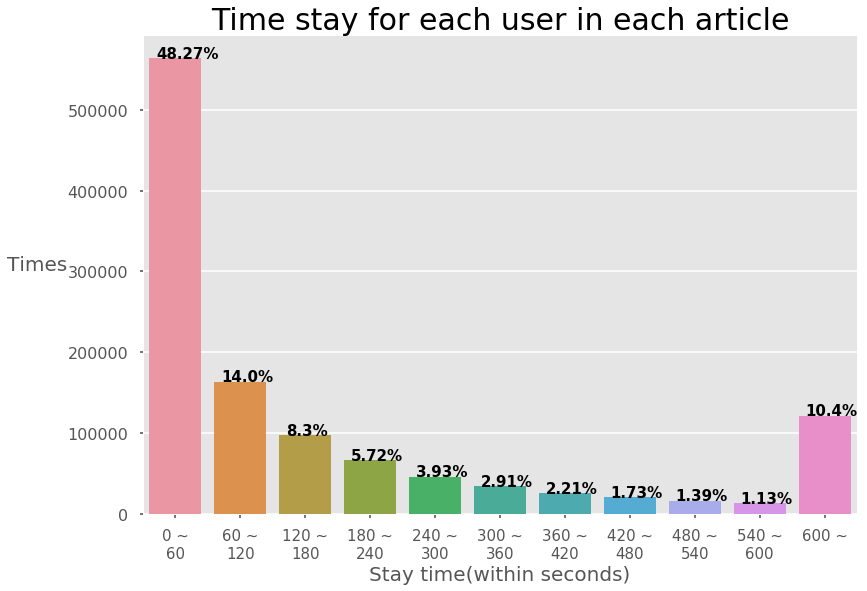

In [734]:
grouping_list = [i for i in range(0,720,60)]
grouping_list_time = grouping_function(list_all_time,grouping_list)


fig,ax = plt.subplots()

g = sns.barplot(x = pd.Series(grouping_function(list_all_time,grouping_list)).value_counts(sort = False).keys().tolist()
                , y = pd.Series(grouping_function(list_all_time,grouping_list)).value_counts(sort = False))
y = pd.Series(grouping_function(list_all_time,grouping_list)).value_counts(sort = False)
for i,v in enumerate(y):
    g.text(i-0.3 ,v ,str(round(v*100/sum(y),2))+'%',fontweight = 'bold',size = 15)
plt.title('Time stay for each user in each article',size = 30)    
plt.xlabel('Stay time(within seconds)',size = 20)
plt.ylabel('Times',rotation = 'horizontal',size = 20,labelpad=30)
plt.xticks(np.arange(11),[str(i*60)+' ~\n'+str((i+1)*60) if i !=10 else '600 ~' for i in range(11)],size = 15)

# Article

In [763]:
df_article_id.shape[0]

50139

In [764]:
len(df_article_id.id.value_counts())

45811

Text(0.5, 0, 'Numbers of Article')

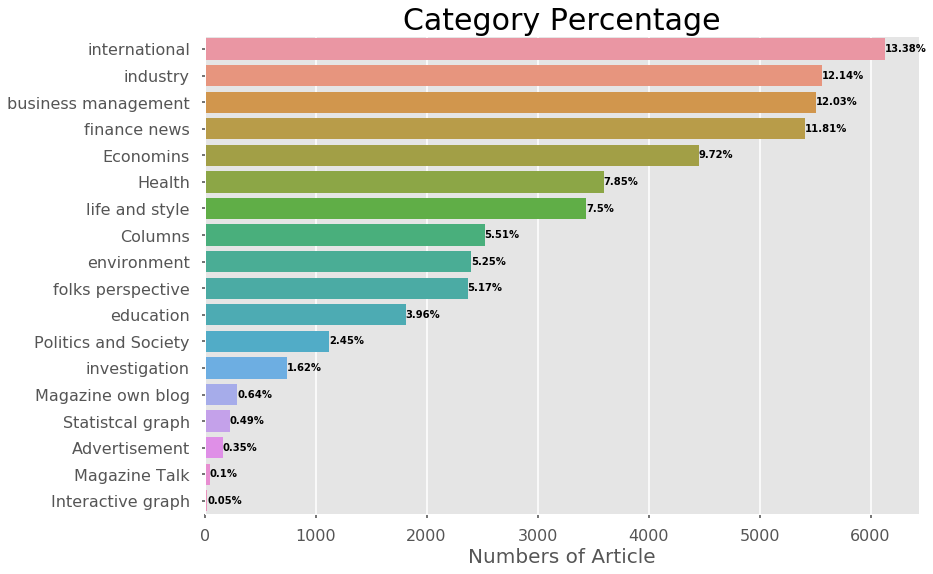

In [794]:
keys = df_article_id.drop_duplicates(subset='id').masterChannelTitle.value_counts().keys()
values = df_article_id.drop_duplicates(subset='id').masterChannelTitle.value_counts().values
map_dict = {'產業':'industry','財經時事':'finance news','國際':'international','經營管理':'business management',
'時尚生活':'life and style','環境':'environment','教育':'education','人物觀點':'folks perspective',
'調查':'investigation','經濟學人':'Economins','數據圖表':'Statistcal graph','政治社會':'Politics and Society',
'專欄':'Columns','健康關係':'Health','@想像未來':'Advertisement','天下雜誌部落格':'Magazine own blog',
'天下Talk':'Magazine Talk','互動圖表':'Interactive graph'}
keys_map = []
for i in keys:
    keys_map.append(map_dict[i])

fig,ax = plt.subplots()

g = sns.barplot(y = keys_map , x = values,orient='h')


x = values
for i,v in enumerate(x):
    g.text(v ,i+0.1 ,str(round(v*100/sum(x),2))+'%',fontweight = 'bold',size = 10)

plt.title('Category Percentage',size = 30)    
ax.set_xlabel('Numbers of Article',size = 20)
